# <font style = "color:rgb(50,120,229)">Face Alignment</font>

- 얼굴검출 : dlib 5-point landmark detector

## <font style = "color:rgb(50,120,229)">5-point landmark detector in Dlib</font>
<center> <img src = "https://www.learnopencv.com/wp-content/uploads/2018/09/fld-5-point-model.jpg" width=500/></center>

In [0]:
import dlib
import cv2
import numpy as np
import math

In [0]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

np.set_printoptions(precision=2)

In [0]:
# Get the face detector
faceDetector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor("data/models/shape_predictor_5_face_landmarks.dat")

In [0]:
# Read image
im = cv2.imread("images/face2.png")
#im = cv2.imread("./images/tv_2person.jpg")

# 출력 얼굴 영상 크기 : 300x?  (?는 원본과 가로세로비율 맞도록 자동설정)
w = 300
h = np.int(w * im.shape[0]/im.shape[1])

Number of faces detected:  1
face 0 : (94,214)-(273,393)
eyecornerSrc : [[[138 262]
  [247 247]]]
eyecornerDst : [(90, 141), (210, 141)]
xform : [[ 1.08e+00 -1.49e-01 -2.01e+01]
 [ 1.49e-01  1.08e+00 -1.63e+02]]


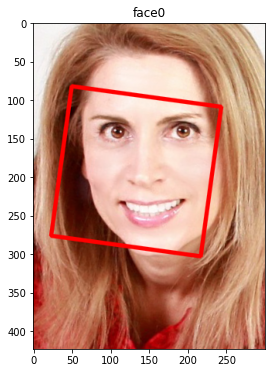

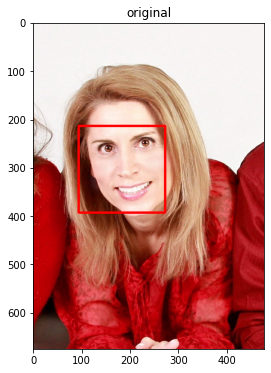

In [0]:
# Detect faces in the image
faceRects = faceDetector(im, 0)
print("Number of faces detected: ",len(faceRects))

# Loop over all detected face rectangles
for i in range(0, len(faceRects)):
  # draw rect on detected face
    x1 = faceRects[i].left()
    y1 = faceRects[i].top()
    x2 = faceRects[i].right()
    y2 = faceRects[i].bottom()
    cv2.rectangle(im, (x1, y1), (x2, y2), (0, 0, 255), 3)
    print('face {} : ({},{})-({},{})'.format(i, x1, y1, x2, y2))

  # For every face rectangle, run landmarkDetector
    landmarks = landmarkDetector(im, faceRects[i])
    point2 = (landmarks.part(2).x, landmarks.part(2).y) # right eye
    point0 = (landmarks.part(0).x, landmarks.part(0).y) # left eye
    eyecornerSrc = [point2, point0]

  # Corners of the eye in normalized image
    eyecornerDst = [(np.int(0.3 * w), np.int(h/3)),
                  (np.int(0.7 * w), np.int(h/3))]

    print('eyecornerSrc :', np.array([eyecornerSrc]))
    print('eyecornerDst :', eyecornerDst)
  
  # get transform matrix
    ret = cv2.estimateAffinePartial2D(np.array([eyecornerSrc]), np.array([eyecornerDst]))
    xform = ret[0]
    print('xform :', xform)

  # apply transform
    imOut = cv2.warpAffine(im, xform, (w, h))
    plt.figure()
    plt.imshow(imOut[:,:,::-1]); plt.title('face'+np.str(i))
    
plt.figure()
plt.imshow(im[:,:,::-1])
plt.title("original")
plt.show()